# Exercises XP

### Exercise 1 : Exploratory Data Analysis

Instructions

- Load the data from CSV files
- Remove target column from the training data
- Split the data intro train/test split
- Understand the data
__________________________________________

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install xgboost
import xgboost as xgb
sns.set_theme()


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv('dataset_heart.csv')
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [3]:
target = 'heart disease'

x= df.drop(target, axis = 1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.70, test_size=0.30, random_state=1)

This table contains different parameters that could be factors that induce a heart disease. 


### Exercise 2 : Logistic Regression without Grid Search

Instructions

Use the dataset to build a logistic regression model without using grid search. Split the data into training and testing sets, then train a logistic regression model and evaluate its performance on the test set.
_________________________________________

In [4]:
model = LogisticRegression(max_iter = 10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

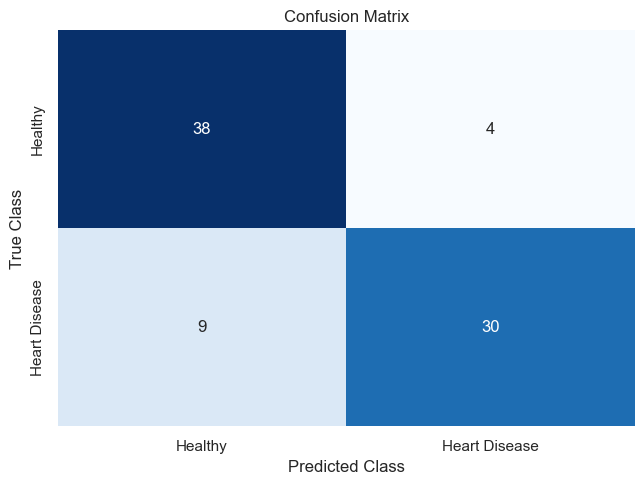

In [5]:
class_names = ['Healthy', 'Heart Disease']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [6]:
model.C

1.0

In [7]:
print(f"Accuracy Score: {np.round(accuracy_score(y_test, y_pred),2)}")

Accuracy Score: 0.84


### Exercise 3 : Logistic Regression with Grid Search
Instructions

Build a logistic regression model using the dataset, but this time, use GridSearchCV to optimize the hyperparameters such as C and penalty.

-------------------------

In [8]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
model = LogisticRegression(max_iter = 10000)

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV object to the data
logreg_cv.fit(X_train, y_train)

y_pred_2 = logreg_cv.predict(X_test)
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.8520625889046942


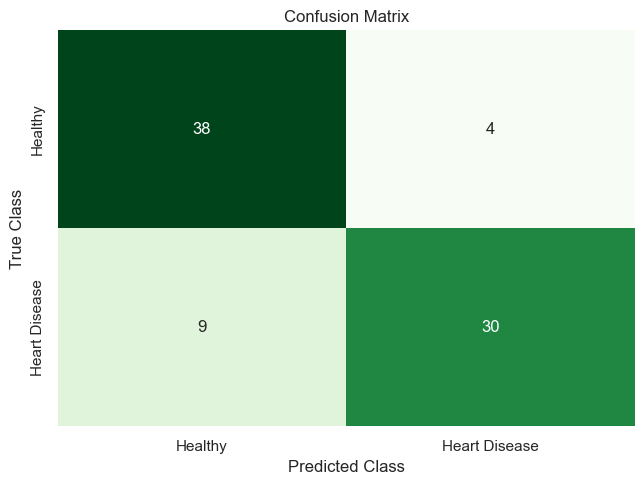

In [9]:
class_names = ['Healthy', 'Heart Disease']
matrix = confusion_matrix(y_test, y_pred_2)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [10]:
print(f"Accuracy Score: {np.round(accuracy_score(y_test, y_pred_2),2)}")

Accuracy Score: 0.84


It's giving the same results, which is unexpected.

### Exercise 4 : SVM without Grid Search
Instructions

Train a Support Vector Machine (SVM) classifier on the dataset without using grid search. Choose an appropriate kernel and set the hyperparameters manually.

__________________________

In [11]:
# Create and train the Support Vector Classifier
svc_model = SVC(C = 0.9, kernel = 'linear') # DEFAULT IS RBF, LINEAR DOES WAY BETTER
svc_model.fit(X_train, y_train)

# Make predictions on the test set
svc_y_pred = svc_model.predict(X_test)

# Calculate accuracy
svc_accuracy = accuracy_score(y_test, svc_y_pred)
print(f'Accuracy (SVC): {svc_accuracy}')

Accuracy (SVC): 0.8024691358024691


### Exercise 5 : SVM with Grid Search
Instructions

Implement an SVM classifier on the dataset with GridSearchCV to find the best combination of C, kernel, and gamma hyperparameters.
_____________________________

In [13]:
# Creating the hyperparameter grid
param_grid = { 'C': [0.1, 1, 10],'kernel': ["linear"], 'gamma': ["scale", "auto"]}

# Instantiating logistic regression classifier
model = SVC()

# Instantiating the GridSearchCV object
model_GS = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV object to the data
model_GS.fit(X_train, y_train)

y_pred = model_GS.predict(X_test)
# Print the tuned parameters and score
print("Tuned SVC Parameters: {}".format(model_GS.best_params_))
print("Best score is {}".format(model_GS.best_score_))
svc_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (SVC): {svc_accuracy}')

Tuned SVC Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score is 0.841678520625889
Accuracy (SVC): 0.8518518518518519


There are more hyperparameters to add to the hyperparameter grid, but it takes forever to run. This improved the accuracy anyway.

### Exercise 6 : XGBoost without Grid Search
Instructions

Use the dataset to train an XGBoost classifier without hyperparameter tuning. Set the hyperparameters manually and justify your choices.
__________________________________

In [53]:
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=1, subsample=1, colsample_bytree=1)

model.fit(X_train, y_train-1)

# Make predictions on the test set
y_pred = model.predict(X_test)+1

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8641975308641975


With these set of hyperparameters we obtain a great accuracy score.

### Exercise 7 : XGBoost with Grid Search
Instructions

Train an XGBoost classifier on the dataset using GridSearchCV to optimize hyperparameters such as learning_rate, n_estimators, max_depth, etc.

________________________


In [57]:
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 2, 3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train-1)

y_pred = grid_search.predict(X_test)+1
# Print the tuned parameters and score
print("Tuned XGBoost Parameters: {}".format(grid_search.best_params_))
print("Best score is {}".format(grid_search.best_score_))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (XGBoost): {accuracy}')

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Tuned XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200, 'subsample': 0.8}
Best score is 0.8522048364153628
Accuracy (XGBoost): 0.8518518518518519


Apparently, manual inspection for the best hyperparameters resulted in a better accuracy score than with the grid search.